## 2. Check the labeling report

In [3]:
import torch
# Report saved to ./results/dolly/dolly_report.pt


dataset_name = 'tulu_300k'
model_name= "mistralai/Mistral-7B-Instruct-v0.3"
# model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"

reports = torch.load(f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt")

==== Docta: Doctor for your data. Current version: 0.2 ====


In [ ]:
reports.detection.keys()
reports.curation.keys()

In [ ]:
### report structure

{
    'names': {
        'diagnose': {
            'T': None, # square matrix
            'p_clean': None,  # row vector
            'p_org': None,  # row vector
            'class_distribution': None,  # histogram
            'group_distribution': None,  # histogram      
        },
        'detection': {
            'label_error': None, # (index, confidence)
            'coexistence': None, # (index, confidence)
            'rare_example': None, # (index, confidence)
        },
        'curation': {
            'label_curation':  None, # (index, suggested_label, confidence)
            'sampling_strategy': None, # (index, suggested_sample)
            'feature_curation': None, # (index, suggested_feature)      
        },
        'audition': {
            'model_perf': None, # (head_perf, tail_perf, overall_perf). 
            'fairness':  None, # (group_vec, performance_vec), disparity  
            'stress_test': None, # model_perf after distribution shift
        }
    }
}


### 2.1 Print Noise Transition Matrix

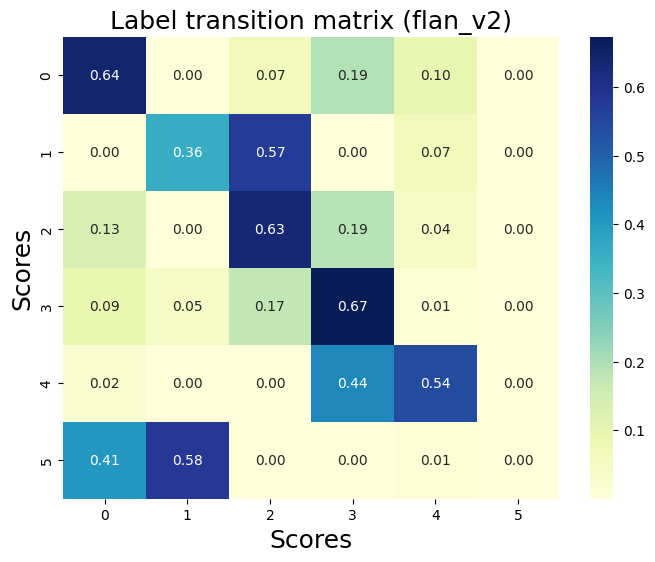

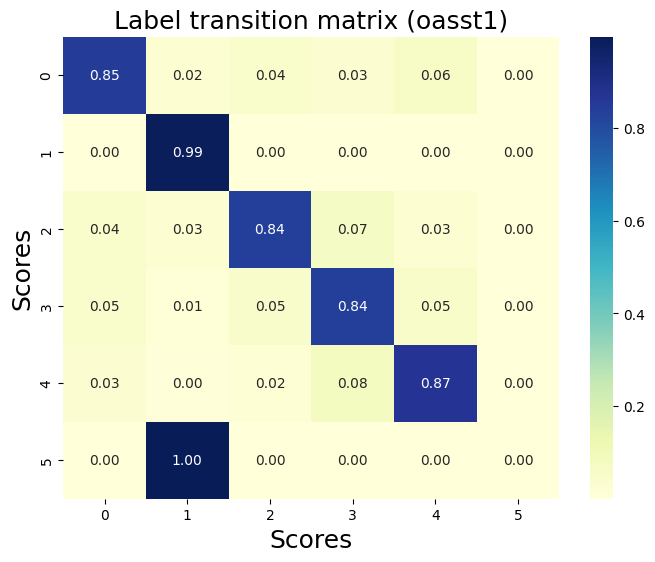

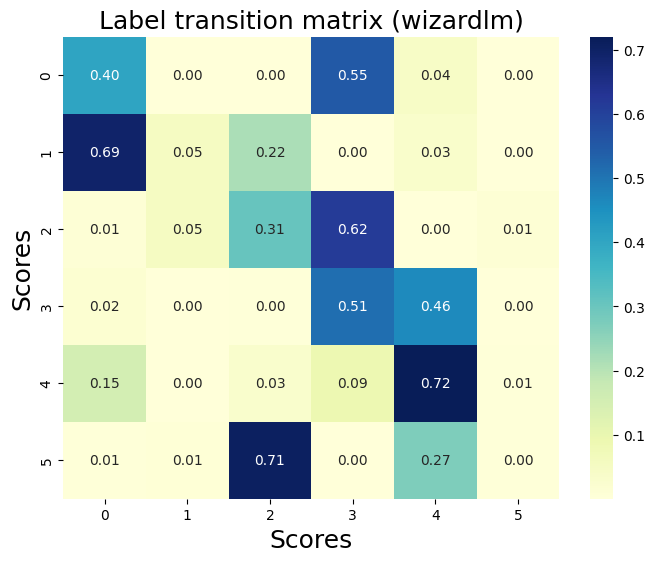

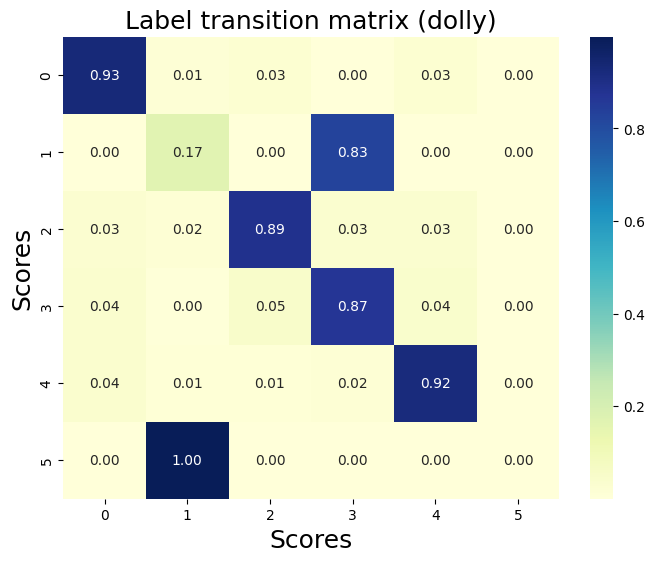

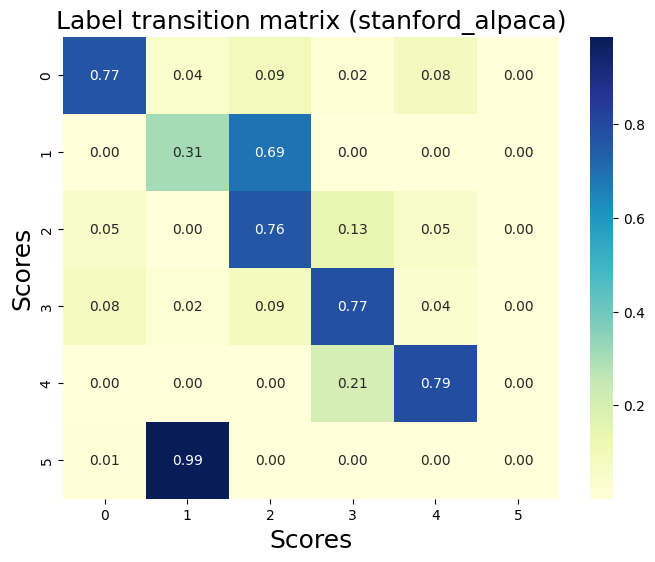

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# List of datasets to process and model name
dataset_list = ['tulu_300k']
model_name = "mistralai/Mistral-7B-Instruct-v0.3"

# Loop through each dataset in the list
for dataset_name in dataset_list:
    # Load report file for each dataset
    report_path = f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt"
    reports = torch.load(report_path)

    # Extract transition matrix data
    data = reports.diagnose['T']

    # Set figure size
    plt.figure(figsize=(8, 6))

    # Plot heatmap using seaborn
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")

    # Add title and labels
    plt.title(f'Label transition matrix ({dataset_name})', fontsize=18)
    plt.xlabel('Scores', fontsize=18)
    plt.ylabel('Scores', fontsize=18)

    # Display the plot
    plt.show()
